In [8]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [9]:
# convert to numeric, drop nas and other [currently] irrelevant features
def preprocess(filename):
    df = pd.read_csv(filename+'.csv', sep=",")
    # removing unnecessary columns. keeping only numbers atm
    unnecessary = ['Body','ClosedDate','CommunityOwnedDate','CreationDate','Id','LastActivityDate',
              'LastEditDate','LastEditorUserId','LastEditorDisplayName','OwnerDisplayName',
              'OwnerUserId','ParentId','Tags','Title','Clean_Text','AcceptedAnswerId','Score',
              'AnswerCount', 'CommentCount', 'FavoriteCount', 'PostTypeId','ViewCount']
    droppable = np.intersect1d(df.columns,unnecessary)
    df = df.drop(droppable, 1)
    df = df.dropna()
    if df.shape[0]>30000:
        df = df[:30000]
    return df

In [10]:
# Split Data Into Train and Test Data
def splitIntoTestAndTrain(dataFrame,splitBy):
    rand = list(range(len(dataFrame)))
    div = int(len(dataFrame) * splitBy)
    rd.shuffle(rand)
    train_df_index = rand[:div]
    test_df_index = rand[div:]
    train_df = dataFrame.iloc[train_df_index, :]
    test_df = dataFrame.iloc[test_df_index, :]
    return train_df,test_df;

In [11]:
#Best SVM Classifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn import svm, grid_search
def svc_param_selection(X, y, nfolds):
    param_grid = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]
    grid_search = GridSearchCV(svm.SVC(probability=True), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_estimator_

In [12]:
def reportCard(y_true, y_pred, y_proba,name):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    %matplotlib inline
    print('\nReport for:',name)
    target_names = ['low', 'high']
    print(metrics.classification_report(y_true, y_pred, target_names=target_names))
    print("Confusion Matrix\n",metrics.confusion_matrix(y_true,y_pred))
    print("F1 Score:",metrics.f1_score(y_true,y_pred))
    print("Accuracy:",metrics.accuracy_score(y_true,y_pred))
    print("Log Loss:",metrics.log_loss(y_true,y_pred))
    print("AUC Score:",metrics.roc_auc_score(y_true,y_proba[:,1]))
    fpr,tpr,thresholds = metrics.roc_curve(y_true,y_proba[:,1])
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve for {}'.format(name))
    plt.legend(loc='best')
    plt.show()

In [13]:
def svm_run(filename):
    print("\nRunning for",filename)
    df = preprocess(filename)
    print("dataset size is:",df.shape)
    print("columns:",df.columns)
    train,test=splitIntoTestAndTrain(df,0.8)
    print("\nSVM")
    best_svm = svc_param_selection(train.drop('ScoreLabel', 1),train['ScoreLabel'],5)
    grid_svm_pred = best_svm.predict(test.drop('ScoreLabel', 1))
    grid_svm_pred_prob = best_svm.predict_proba(test.drop('ScoreLabel', 1))
    print("*****BOF: {}*****".format(filename))
    reportCard(test['ScoreLabel'], grid_svm_pred, grid_svm_pred_prob,'GridSearched SVM')
    print("*****EOF: {}*****".format(filename))


Running for ai_posts_with_readibility_measures
dataset size is: (1680, 10)
columns: Index(['Flesch_Reading_Ease_Value', 'Coleman_Liau_Index_Value',
       'Dale_Chall_Readability_Score', 'Code_Count', 'Latex_Count',
       'Text_Length', 'Punc_Rate', 'Polarity', 'Subjectivity', 'ScoreLabel'],
      dtype='object')

SVM
*****BOF: ai_posts_with_readibility_measures*****

Report for: GridSearched SVM
             precision    recall  f1-score   support

        low       0.61      0.96      0.75       205
       high       0.44      0.05      0.10       131

avg / total       0.54      0.60      0.49       336

Confusion Matrix
 [[196   9]
 [124   7]]
F1 Score: 0.0952380952381
Accuracy: 0.604166666667
Log Loss: 13.6716204074
AUC Score: 0.523291752001


/Users/amanmahato/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


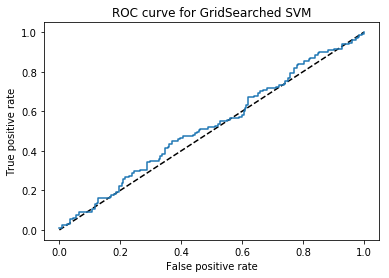

*****EOF: ai_posts_with_readibility_measures*****


In [14]:
svm_run("ai_posts_with_readibility_measures")


Running for iot_posts_with_readibility_measures
dataset size is: (1048, 10)
columns: Index(['Flesch_Reading_Ease_Value', 'Coleman_Liau_Index_Value',
       'Dale_Chall_Readability_Score', 'Code_Count', 'Latex_Count',
       'Text_Length', 'Punc_Rate', 'Polarity', 'Subjectivity', 'ScoreLabel'],
      dtype='object')

SVM
*****BOF: iot_posts_with_readibility_measures*****

Report for: GridSearched SVM
             precision    recall  f1-score   support

        low       0.61      0.48      0.54        95
       high       0.64      0.75      0.69       115

avg / total       0.63      0.63      0.62       210

Confusion Matrix
 [[46 49]
 [29 86]]
F1 Score: 0.688
Accuracy: 0.628571428571
Log Loss: 12.828874948
AUC Score: 0.61528604119


/Users/amanmahato/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


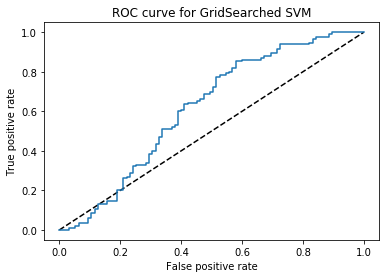

*****EOF: iot_posts_with_readibility_measures*****


In [ ]:
svm_run("iot_posts_with_readibility_measures")